In [50]:
# loading required libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# 1. Data Preprocessing

In [24]:
# loading the data
df = pd.read_excel('/home/anubhav/Downloads/customer_churn_ld.xlsx')
df.head()

,CustomerID,Name,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
0,1,Customer_1,63,Male,Los Angeles,17,73.36,236,0
1,2,Customer_2,62,Female,New York,1,48.76,172,0
2,3,Customer_3,24,Female,Los Angeles,5,85.47,460,0
3,4,Customer_4,36,Female,Miami,3,97.94,297,1
4,5,Customer_5,46,Female,Miami,19,58.14,266,0


In [25]:
print('SUMMARY:')
print(f'there are total {len(df)} of data')
print(f'there are total {df["Churn"].value_counts()[1]} number of data with Churn value as 1')
print(f'there are total {df["Churn"].value_counts()[0]} number of data with Churn value as 0')
print(f'customers are from {df["Location"].unique()} locations')
print(f'there are {df["Gender"].value_counts()["Male"]} data of Males and {df["Gender"].value_counts()["Female"]} of Females')
print(f'Columns with NaN values:')
df.isna().sum()

SUMMARY:
there are total 100000 of data
there are total 49779 number of data with Churn value as 1
there are total 50221 number of data with Churn value as 0
customers are from ['Los Angeles' 'New York' 'Miami' 'Chicago' 'Houston'] locations
there are 49784 data of Males and 50216 of Females
Columns with NaN values:


CustomerID                    0
Name                          0
Age                           0
Gender                        0
Location                      0
Subscription_Length_Months    0
Monthly_Bill                  0
Total_Usage_GB                0
Churn                         0
dtype: int64

In [26]:
print(f" LA: {df['Location'].value_counts()['Los Angeles']:}")
print(f" NY: {df['Location'].value_counts()['New York']:}")
print(f" Miami: {df['Location'].value_counts()['Miami']:}")
print(f" Chicago: {df['Location'].value_counts()['Chicago']:}")
print(f" Houston: {df['Location'].value_counts()['Houston']:}")

 LA: 20041
 NY: 19813
 Miami: 20031
 Chicago: 19958
 Houston: 20157


In [27]:
df_la = df.loc[df['Location']=='Los Angeles']
df_la

,CustomerID,Name,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
0,1,Customer_1,63,Male,Los Angeles,17,73.36,236,0
2,3,Customer_3,24,Female,Los Angeles,5,85.47,460,0
9,10,Customer_10,53,Female,Los Angeles,12,64.49,383,1
11,12,Customer_12,44,Male,Los Angeles,20,95.71,295,1
23,24,Customer_24,70,Male,Los Angeles,4,51.21,389,1
...,...,...,...,...,...,...,...,...,...
99965,99966,Customer_99966,56,Female,Los Angeles,16,80.45,126,1
99970,99971,Customer_99971,19,Male,Los Angeles,1,32.27,439,1
99977,99978,Customer_99978,26,Female,Los Angeles,13,95.68,313,1
99981,99982,Customer_99982,24,Female,Los Angeles,20,56.59,143,1


In [28]:
df_ny = df.loc[df['Location']=='New York']
df_mi = df.loc[df['Location']=='Miami']
df_ch = df.loc[df['Location']=='Chicago']

In [29]:
print(f" LA: {df_la['Churn'].value_counts()[1]:}")
print(f" NY: {df_ny['Churn'].value_counts()[1]:}")
print(f" Miami: {df_mi['Churn'].value_counts()[1]:}")
print(f" Chicago: {df_ch['Churn'].value_counts()[1]:}")

 LA: 9880
 NY: 9979
 Miami: 10076
 Chicago: 9945


# 2. Feature Engineering

In [30]:
# creating average monthly usage feature
df['Average_Monthly_Usage'] = df['Total_Usage_GB']/df['Subscription_Length_Months']
df.head(10)

,CustomerID,Name,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn,Average_Monthly_Usage
0,1,Customer_1,63,Male,Los Angeles,17,73.36,236,0,13.882353
1,2,Customer_2,62,Female,New York,1,48.76,172,0,172.000000
2,3,Customer_3,24,Female,Los Angeles,5,85.47,460,0,92.000000
3,4,Customer_4,36,Female,Miami,3,97.94,297,1,99.000000
4,5,Customer_5,46,Female,Miami,19,58.14,266,0,14.000000
5,6,Customer_6,67,Male,New York,15,82.65,456,1,30.400000
6,7,Customer_7,30,Female,Chicago,3,73.79,269,0,89.666667
7,8,Customer_8,67,Female,Miami,1,97.70,396,1,396.000000
8,9,Customer_9,20,Female,Miami,10,42.45,150,1,15.000000
9,10,Customer_10,53,Female,Los Angeles,12,64.49,383,1,31.916667


In [31]:
# creating bill to usage ratio feature
df['Bill_to_usage_ratio'] = df['Monthly_Bill']/df['Total_Usage_GB']
df.head()

,CustomerID,Name,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn,Average_Monthly_Usage,Bill_to_usage_ratio
0,1,Customer_1,63,Male,Los Angeles,17,73.36,236,0,13.882353,0.310847
1,2,Customer_2,62,Female,New York,1,48.76,172,0,172.000000,0.283488
2,3,Customer_3,24,Female,Los Angeles,5,85.47,460,0,92.000000,0.185804
3,4,Customer_4,36,Female,Miami,3,97.94,297,1,99.000000,0.329764
4,5,Customer_5,46,Female,Miami,19,58.14,266,0,14.000000,0.218571


In [32]:
# creaeting subscription cost feature
df['Subscription_cost'] = df['Monthly_Bill']*df['Subscription_Length_Months']
df.head()

,CustomerID,Name,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn,Average_Monthly_Usage,Bill_to_usage_ratio,Subscription_cost
0,1,Customer_1,63,Male,Los Angeles,17,73.36,236,0,13.882353,0.310847,1247.12
1,2,Customer_2,62,Female,New York,1,48.76,172,0,172.000000,0.283488,48.76
2,3,Customer_3,24,Female,Los Angeles,5,85.47,460,0,92.000000,0.185804,427.35
3,4,Customer_4,36,Female,Miami,3,97.94,297,1,99.000000,0.329764,293.82
4,5,Customer_5,46,Female,Miami,19,58.14,266,0,14.000000,0.218571,1104.66


In [33]:
# creating binds to make predictors based on age group
bins = [18, 28, 38, 48, 58, 70]

# Create a new column 'Age_Bin' by assigning bins to ages
df['Age_Bin'] = pd.cut(df['Age'], bins=bins, labels=['18-28', '29-38', '39-48', '49-58', '59-70'])

df.head()

,CustomerID,Name,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn,Average_Monthly_Usage,Bill_to_usage_ratio,Subscription_cost,Age_Bin
0,1,Customer_1,63,Male,Los Angeles,17,73.36,236,0,13.882353,0.310847,1247.12,59-70
1,2,Customer_2,62,Female,New York,1,48.76,172,0,172.000000,0.283488,48.76,59-70
2,3,Customer_3,24,Female,Los Angeles,5,85.47,460,0,92.000000,0.185804,427.35,18-28
3,4,Customer_4,36,Female,Miami,3,97.94,297,1,99.000000,0.329764,293.82,29-38
4,5,Customer_5,46,Female,Miami,19,58.14,266,0,14.000000,0.218571,1104.66,39-48


In [34]:
age_bin_dummies = pd.get_dummies(df['Age_Bin'], prefix='Age_Bin')

# Concatenate the one-hot encoded columns with the original DataFrame
df = pd.concat([df, age_bin_dummies], axis=1)
df.head()

,CustomerID,Name,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn,Average_Monthly_Usage,Bill_to_usage_ratio,Subscription_cost,Age_Bin,Age_Bin_18-28,Age_Bin_29-38,Age_Bin_39-48,Age_Bin_49-58,Age_Bin_59-70
0,1,Customer_1,63,Male,Los Angeles,17,73.36,236,0,13.882353,0.310847,1247.12,59-70,0,0,0,0,1
1,2,Customer_2,62,Female,New York,1,48.76,172,0,172.000000,0.283488,48.76,59-70,0,0,0,0,1
2,3,Customer_3,24,Female,Los Angeles,5,85.47,460,0,92.000000,0.185804,427.35,18-28,1,0,0,0,0
3,4,Customer_4,36,Female,Miami,3,97.94,297,1,99.000000,0.329764,293.82,29-38,0,1,0,0,0
4,5,Customer_5,46,Female,Miami,19,58.14,266,0,14.000000,0.218571,1104.66,39-48,0,0,1,0,0


In [35]:
df = pd.get_dummies(df, columns=['Gender'])
df = pd.get_dummies(df, columns=['Location'])
df.head(10)

,CustomerID,Name,Age,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn,Average_Monthly_Usage,Bill_to_usage_ratio,Subscription_cost,...,Age_Bin_39-48,Age_Bin_49-58,Age_Bin_59-70,Gender_Female,Gender_Male,Location_Chicago,Location_Houston,Location_Los Angeles,Location_Miami,Location_New York
0,1,Customer_1,63,17,73.36,236,0,13.882353,0.310847,1247.12,...,0,0,1,0,1,0,0,1,0,0
1,2,Customer_2,62,1,48.76,172,0,172.000000,0.283488,48.76,...,0,0,1,1,0,0,0,0,0,1
2,3,Customer_3,24,5,85.47,460,0,92.000000,0.185804,427.35,...,0,0,0,1,0,0,0,1,0,0
3,4,Customer_4,36,3,97.94,297,1,99.000000,0.329764,293.82,...,0,0,0,1,0,0,0,0,1,0
4,5,Customer_5,46,19,58.14,266,0,14.000000,0.218571,1104.66,...,1,0,0,1,0,0,0,0,1,0
5,6,Customer_6,67,15,82.65,456,1,30.400000,0.181250,1239.75,...,0,0,1,0,1,0,0,0,0,1
6,7,Customer_7,30,3,73.79,269,0,89.666667,0.274312,221.37,...,0,0,0,1,0,1,0,0,0,0
7,8,Customer_8,67,1,97.70,396,1,396.000000,0.246717,97.70,...,0,0,1,1,0,0,0,0,1,0
8,9,Customer_9,20,10,42.45,150,1,15.000000,0.283000,424.50,...,0,0,0,1,0,0,0,0,1,0
9,10,Customer_10,53,12,64.49,383,1,31.916667,0.168381,773.88,...,0,1,0,1,0,0,0,1,0,0


/tmp/ipykernel_44650/4272653438.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True,cmap='Greens')


<Axes: >

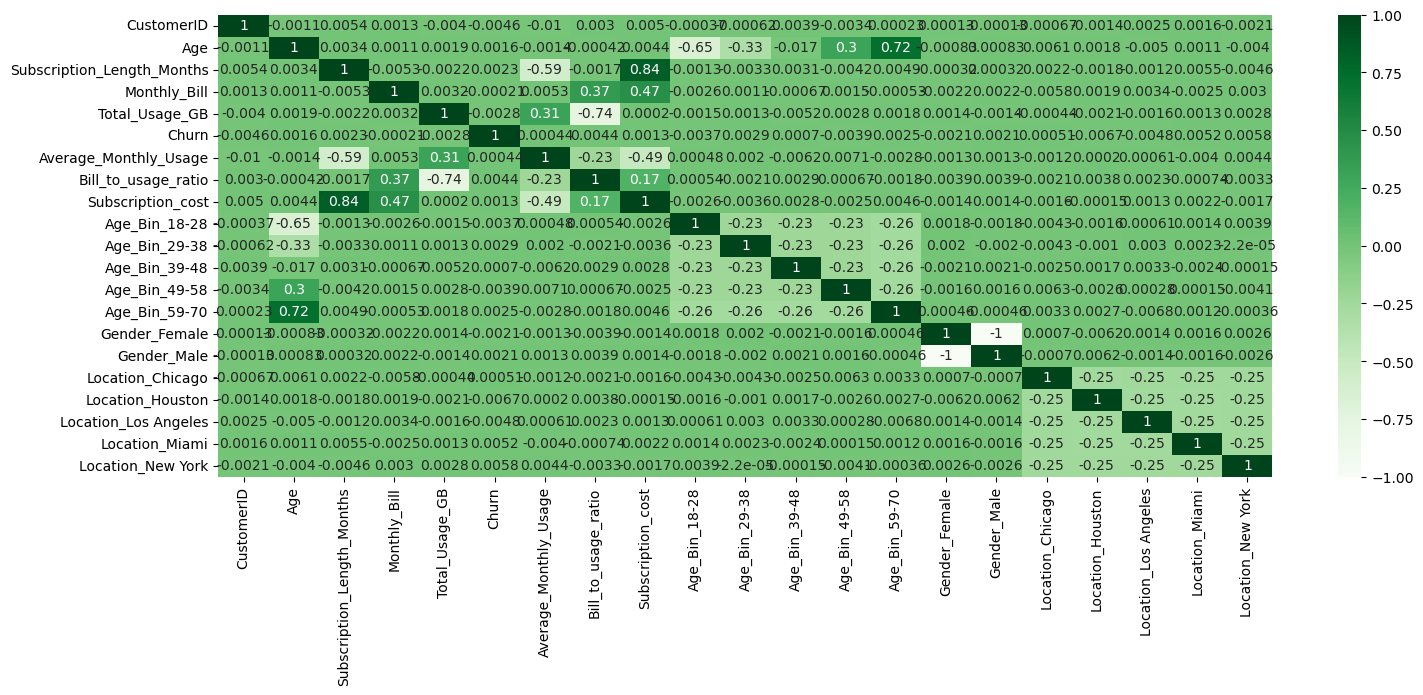

In [36]:
plt.figure(figsize=(17,6))
sns.heatmap(df.corr(),annot=True,cmap='Greens')

In [37]:
df.describe()

,CustomerID,Age,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn,Average_Monthly_Usage,Bill_to_usage_ratio,Subscription_cost,Age_Bin_18-28,...,Age_Bin_39-48,Age_Bin_49-58,Age_Bin_59-70,Gender_Female,Gender_Male,Location_Chicago,Location_Houston,Location_Los Angeles,Location_Miami,Location_New York
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,...,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,50000.500000,44.027020,12.490100,65.053197,274.393650,0.497790,43.349682,0.334876,811.779157,0.188240,...,0.188480,0.189840,0.226470,0.502160,0.497840,0.199580,0.201570,0.200410,0.200310,0.198130
std,28867.657797,15.280283,6.926461,20.230696,130.463063,0.499998,65.786483,0.276170,533.858809,0.390906,...,0.391097,0.392176,0.418549,0.499998,0.499998,0.399687,0.401175,0.400309,0.400234,0.398593
min,1.000000,18.000000,1.000000,30.000000,50.000000,0.000000,2.083333,0.060180,30.060000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,25000.750000,31.000000,6.000000,47.540000,161.000000,0.000000,12.687500,0.161164,378.240000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,50000.500000,44.000000,12.000000,65.010000,274.000000,0.000000,21.909091,0.237485,726.340000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,75000.250000,57.000000,19.000000,82.640000,387.000000,1.000000,42.545455,0.402747,1161.862500,0.000000,...,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,100000.000000,70.000000,24.000000,100.000000,500.000000,1.000000,500.000000,1.999200,2399.520000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [38]:
# looking at the data to see what percentage of customers are churning
df['Churn'].value_counts()

0    50221
1    49779
Name: Churn, dtype: int64

In [39]:
# dropping unrequired columns
X = df.drop(['Churn','CustomerID','Name','Age_Bin'],axis=1)
Y = df['Churn']

In [40]:
Y

0        0
1        0
2        0
3        1
4        0
        ..
99995    1
99996    0
99997    1
99998    1
99999    1
Name: Churn, Length: 100000, dtype: int64

# 4. Model Buidling

In [41]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y, test_size=0.2, random_state=42)

In [42]:
sc = StandardScaler()

In [43]:
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [44]:
X_train

array([[ 0.65344669, -1.08272837,  0.96025455, ..., -0.50027342,
        -0.50236218,  2.00871348],
       [-1.04827574,  1.66388226,  0.83962354, ..., -0.50027342,
        -0.50236218,  2.00871348],
       [ 0.84979927, -0.07081919, -0.63217363, ..., -0.50027342,
        -0.50236218, -0.49783108],
       ...,
       [ 1.63520963, -1.51640373,  0.55188892, ..., -0.50027342,
        -0.50236218, -0.49783108],
       [ 0.71889755, -0.07081919,  1.19212316, ..., -0.50027342,
        -0.50236218, -0.49783108],
       [-1.17917747,  0.65197308,  0.26365992, ...,  1.99890691,
        -0.50236218, -0.49783108]])

In [45]:
model = LogisticRegression()

In [46]:
model.fit(X_train,Y_train)

LogisticRegression()

In [47]:
Y_pred = model.predict(X_test)

In [49]:
print(f'accuracy score : {accuracy_score(Y_test,Y_pred)}')
print(f'precision score : {precision_score(Y_test,Y_pred)}')
print(f'recall score : {recall_score(Y_test,Y_pred)}')
print(f'f1 score : {f1_score(Y_test,Y_pred)}')

accuracy score : 0.505
precision score : 0.5013391149088127
recall score : 0.39623021872795083
f1 score : 0.4426303344217994
